In [1]:
!export CUDA_VISIBLE_DEVICES=0

In [2]:
from main_simple_lib import *

File already downloaded.
/data/mn27889/vipergpt/histocartography/preprocessing/../checkpoints/pannuke.pt


2024-05-03 13:17:30.524466: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 13:17:30.688070: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 13:17:31.508191: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/mn27889/miniconda3/envs/llavamed-vipergpt/lib/python3.10/site-packages/cv2/../../

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
import pickle
img_train_path = "/data/mn27889/pvqa/images/test/"
qas_train_path = "/data/mn27889/pvqa/qas/test/test_qa.pkl"

with open(qas_train_path, 'rb') as file:
    pvqa_qas = pickle.load(file)

In [4]:
qas_yes_no = [qas for qas in pvqa_qas if qas['answer'] == 'yes' or qas['answer'] == 'no']
ques_yes_no = [qas['question'] for qas in qas_yes_no]
ans_yes_no = [qas['answer'] for qas in qas_yes_no]
img_yes_no = [qas['image']  for qas in qas_yes_no]
img_yes_no_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_yes_no]

In [5]:
qas_general = [qas for qas in pvqa_qas if qas['answer'] != 'yes' and qas['answer'] != 'no']
ques_general = [qas['question'] for qas in qas_general]
ans_general = [qas['answer'] for qas in qas_general]
img_general = [qas['image']  for qas in qas_general]
img_general_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_general]

In [6]:
# for i, img in enumerate(img_general):
#     if img == "test_0013":
#         print(i)

### For a Pathology Image

Question:  What are the tubular epithelial cells distended with?

Answer:  cytoplasmic vacuoles

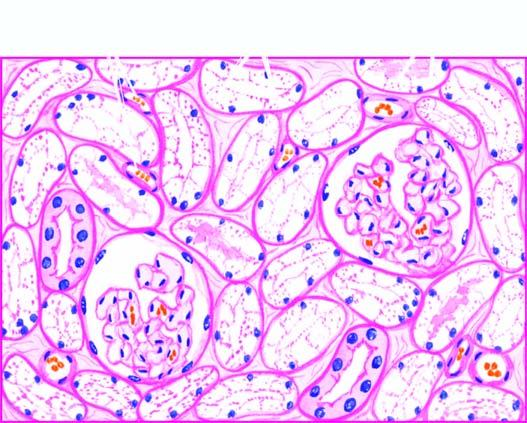

In [10]:
idx = 219
query = ques_general[idx]
query_ans = ans_general[idx]
query_img = Image.open(img_general_path[idx]).convert(mode="RGB")
print("Question: ", query)
print("Answer: ", query_ans)
query_img

In [11]:
# # Baseline: llava-med
# image_patch = ImagePatch(query_img)                       
# image_patch.llava_med_general_query(query)

In [12]:
# ans = image_patch.llm_query(f"To solve the question: {query}, give me the reasoning small questions to answer this question")
# print(ans)


In [13]:
# ans.split('\n')
# small_answers = []
# for question in ans.split('\n'):
#     small_answers.append(image_patch.llava_med_general_query(query))
# print(small_answers)
# image_patch.llm_query(" ".join(small_answers) + " Please summarize this information.")                    

In [14]:
code = get_code(query)

  0 def execute_command(image) -> str:                                                                             
  1     image_patch = ImagePatch(image)                                                                            
  2     key_patches = image_patch.find_histo_patches()                                                             
  3     answers = []                                                                                               
  4     for patch in key_patches:                                                                                  
  5         if patch.llava_med_exists("tubular epithelial cells"):                                                 
  6             answers.append(patch.medical_expert_query("What are the tubular epithelial cells distended with?"))
  7     answers = "".join(answers)                                                                                 
  8     return image_patch.medical_expert_summarization(answers)                                                   

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

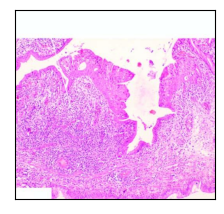

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

location = Assistant: determining the specific organ or tissue site under examination

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

selected_coordinates [(68, 226, 340, 483), (238, 226, 510, 483), (0, 226, 170, 483)]

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

key_patches[0] =

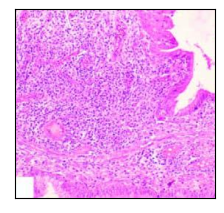

key_patches[1] =

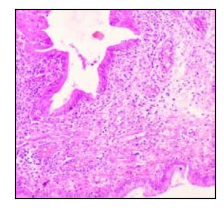

key_patches[2] =

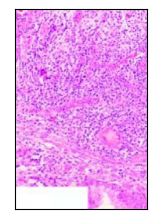

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

answers is empty

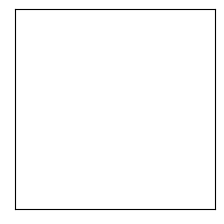

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

patch =

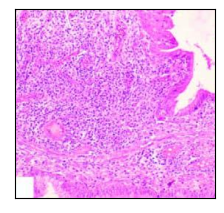

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

patch.llava_med_exists('foci of metaplastic squamous epithelium') = False

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

patch =

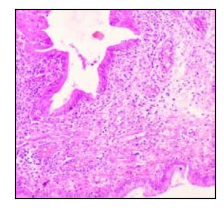

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

patch.llava_med_exists('foci of metaplastic squamous epithelium') = False

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

patch =

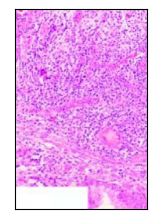

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

patch.llava_med_exists('foci of metaplastic squamous epithelium') = False

───────────────────────────────────────────────────── Line 9 ──────────────────────────────────────────────────────

answers =

───────────────────────────────────────────────────── Line 10 ─────────────────────────────────────────────────────

image_patch.medical_expert_summarization(location + abnormalities + answers) = It appears that the assistant is 
stating that they are unable to determine the specific organ or tissue site being examined.

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = It seems that the assistant is not able to determine the specific organ or tissue site that is being 
examined.

'It seems that the assistant is not able to determine the specific organ or tissue site that is being examined.'

In [9]:
execute_code(code, query_img, show_intermediate_steps=True)